Inicializacja wielowymiarowej liczby dualnej

In [1]:
struct Dual{T <:Number} <: Number
    v::T
    dv::Vector{T}
end


Rozmiar chunka -> długości wektora dv

In [2]:
chunk_leng=10

10

Załadowanie danych uczacych i testujących

In [3]:
using MLDatasets

# load full training set
train_x = MNIST.testtensor(Float64)
train_y = MNIST.testlabels()

# load full test set
test_x,  test_y_dig  = MNIST.testdata()

(FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

...

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N

Zmiana danych w bezie z jednej cyfry na 10 elementową tablicę zer i jedynek (np. 1 -> [1,0,0..])

In [4]:
function class2percentage(train_set :: Array{Int64, 1})
    train_set_per = zeros(Float64, length(train_set), 10)
    for i=1:length(train_set)
        train_set_per[i, train_set[i]+1] = 1
    end
    return train_set_per
end

class2percentage (generic function with 1 method)

In [5]:
train_set_per = class2percentage(train_y)
test_y = class2percentage(test_y_dig)

10000×10 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 ⋮                        ⋮                   
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  

Operacje na liczbach dualnych

In [6]:
import Base: +, -, *, /
-(x::Dual) = Dual(-x.v,-x.dv)
+(x::Dual, y::Dual) = Dual( x.v + y.v, x.dv + y.dv)
-(x::Dual, y::Dual) = Dual( x.v - y.v, x.dv - y.dv)
+(x::Dual, y::Number) = Dual( x.v + y, x.dv)
-(x::Number, y::Dual) = Dual( y.v - x, y.dv)
+(x::Number, y::Dual) = Dual( y.v + x, y.dv)
-(x::Dual, y::Number) = Dual( x.v - y, x.dv)
*(x::Dual, y::Dual) = Dual( x.v * y.v, x.dv.* y.v + x.v.* y.dv)
*(x::Dual, y::Number) = Dual( x.v * y, x.dv.* y)
/(x::Dual, y::Dual) = Dual( x.v / y.v, (x.dv * y.v - x.v * y.dv)/y.v^2)
/(x::Dual, y::Number) = Dual( x.v / y, x.dv/y)
*(x::Number, y::Dual) = Dual( y.v * x, y.dv * x)
/(x::Number, y::Dual) = Dual( y.v / x, y.dv/x)

import Base: abs, sin, cos, tan, exp, sqrt, isless
abs(x::Dual) = Dual(abs(x.v),sign(x.v)*x.dv)
sin(x::Dual) = Dual(sin(x.v), cos(x.v)*x.dv)
cos(x::Dual) = Dual(cos(x.v),-sin(x.v)*x.dv)
tan(x::Dual) = Dual(tan(x.v), one(x.v)*x.dv + tan(x.v)^2*x.dv)
exp(x::Dual) = Dual(exp(x.v), exp(x.v)*x.dv)
sqrt(x::Dual) = Dual(sqrt(x.v),.5/sqrt(x.v) * x.dv)
isless(x::Dual, y::Dual) = x.v < y.v;

import Base: show
show(io::IO, x::Dual) = print(io, "(", x.v, ") + [", x.dv, "ϵ]");
value(x::Dual) = x.v;
partials(x::Dual) = x.dv;

import Base: convert, promote_rule

convert(::Type{Dual{T}}, x::Dual) where T =
Dual(convert(T, x.v), convert(Vector{T}, x.dv))

convert(::Type{Dual{T}}, x::Number, len::Number) where T =
Dual(convert(T, x), zeros(T,len))

convert(::Type{Dual{T}}, x::Number) where T =
Dual(convert(T, x), zeros(T,chunk_leng))

promote_rule(::Type{Dual{T}}, ::Type{R}) where {T,R} =
Dual{promote_type(T,R)}


promote_rule (generic function with 141 methods)

Jakobian dla liczb wielowymiarowych. Różniczkowanie w przód.

In [7]:
J = function jacobian(f, chunk_leng, args::Vector{T}) where {T <:Number}
    jacobian_columns = Matrix{T}[]
    for i=1:ceil(length(args)/chunk_leng)
        x = Dual{T}[]
        for j=1:length(args)
            seed = (j > (i-1) * chunk_leng && j <= i*chunk_leng)
            if seed
                oney = zeros(Float64, chunk_leng)
                index = mod(j -1, chunk_leng)
                oney[index + 1] = 1
                push!(x, Dual(args[j], oney))
            else
                push!(x, Dual(args[j], zeros(Float64, chunk_leng)))
            end

        end
        column = partials.(f(x))
#         println(typeof(column))
#         println(typeof(column[:,:]))
        push!(jacobian_columns, column[:,:])
#         println(typeof(jacobian_columns))
    end
    hjacobian = hcat(jacobian_columns...)
    return hjacobian
end

jacobian (generic function with 1 method)

Algorytm optymalizacyjny -> Algorytm Adagrad

In [8]:
abstract type DescentMethod end
struct GradientDescent <: DescentMethod
 α # learning rate
end

In [90]:
mutable struct Adagrad <: DescentMethod
 α # learning rate
 ϵ # small value
 s # sum of squared gradient
 Adagrad() = new() # new uninitialized structure
end

function init!(M::Adagrad, θ, α=0.9, ϵ=1e-8)
 M.α = α
 M.ϵ = ϵ
 M.s = zero(θ)
 return M
end

init! (generic function with 3 methods)

In [10]:
function softmax!(y)
    sum_y = sum(exp.(y))
    for i=1:length(y)
        y[i] = exp.(y[i]) ./sum_y
    end
end

softmax! (generic function with 1 method)

Inicjalizacja dwóch warstw sieci.

In [93]:
Wh= randn(30, 784)
Wo= randn(10, 30)

10×30 Array{Float64,2}:
  0.917569    -0.875268  -0.915056   0.896988  …   0.0698244   -0.794902
 -2.00304     -0.360961  -0.33778    0.674639     -0.00445328  -1.76623
 -8.34723e-5  -1.03659    0.424244  -0.102681     -0.648003    -0.00312116
 -1.66489     -1.75097   -0.324803  -0.62409      -1.0212       1.33646
 -0.450989    -0.039894  -1.26525   -0.706931      0.109445     0.72419
  1.97459     -0.289064  -0.207428  -0.925723  …   0.776301     0.922037
 -2.43021     -1.33465    0.600936  -1.17299       0.656023     1.10891
  1.16925     -1.8581     1.49836    0.546297      0.713145    -0.0785009
 -0.767056     1.00236    0.812929   0.449202      0.92132      0.288966
  1.55055     -0.203717   0.75979    1.27574      -0.435033    -0.129746

In [12]:
E_gen = Number[]
y_pred = []

0-element Array{Any,1}

In [94]:
function net_test(x, wh, wo, y)
    x̂ = dense(wh, 30, 784, x, σ)
    ŷ = dense(wo, 10, 30, x̂ , linear)
    softmax!(ŷ)
    E = mean_squared_loss(y, ŷ)
    return ŷ, E
end

function net(x, wh, wo, y, chun_len)
    d =reshape(wh, 30,784)
    x̂ = dense(d, 30, 784, x, linear)
    ŷ = dense(wo, 10, 30, x̂ , σ)
    softmax!(ŷ)
    push!(y_pred, ŷ)
    E = mean_squared_loss(y, ŷ)
    return E
end

batch_size = 50

dense(w, n, m, v, f) = f.(reshape(w, n, m) * v)
mean_squared_loss(y, ŷ) = sum(0.5(y - ŷ).^2)
σ(x)= one(x) / (one(x) + exp(-x))
linear(x) = x


dnet_Wh(x, wh, wo, y) = J(w -> net(x, w, wo, y, chunk_leng), chunk_leng, wh);
dnet_Wo(x, wh, wo, y) = J(w -> net(x, wh, w, y, chunk_leng), chunk_leng, wo); 

dWh = similar(Wh)
dWo = similar(Wo)
step_val = similar(Wh)
step_val = similar(Wo)

x_conv = Array{Dual{Float64}}(undef, 784, 1) 
E = Array{Float64, 2}(undef, batch_size, 10)

m = Adagrad()
Mh = init!(m, Wh)
m1 = Adagrad()
Mo = init!(m1, Wo)


for index=1:5
    x = train_x[:,:,1]

    println("od: ", index*batch_size)
    println("do: ", index*batch_size+batch_size-1)

    for i=index*batch_size:index*batch_size+batch_size-1
        x = train_x[:,:,i]
        x = x[:]
        y = train_set_per[i, :]
        dWh[:] = dnet_Wh(x, Wh[:], Wo[:], y)
        dWo[:] = dnet_Wo(x, Wh[:], Wo[:], y)
        α, ϵ, s, g = Mh.α, Mh.ϵ, Mh.s, dWh
        s += g.*g
        Mh.s = s
        step_val = - α*g ./ (sqrt.(s) .+ ϵ)
        Wh = Wh - step_val

        oα, oϵ, os, og = Mo.α, Mo.ϵ, Mo.s, dWo
        os += og.*og
        Mo.s = os
        step_valo = - oα*og ./ (sqrt.(os) .+ oϵ)
        Wo = Wo - step_valo

#         Wo = Wo - 9* dWo
#         Wh = Wh - 9* dWh

    # 
        Ei = net(x, Wh[:], Wo[:], y, chunk_leng)
        E[i]= Ei
        push!(E_gen, Ei)
    end
#         test_net()
    y_predicted_list = Int64[]
    test_len = 10
    E_test = Array{Float64, 2}(undef, test_len, 10)

    for i=1:test_len
        x = test_x[:,:,i]
        x = x[:]
        y = test_y[i,:]
        y_predicted, Ei = net_test(x, Wh[:], Wo[:], y)
#         println(y_predicted)
#         println("==========")
#         println("oczekiwana wartość:", test_y_dig[i], "co wyszło:", argmax(y_predicted)-1)
        push!(y_predicted_list, argmax(y_predicted)-1)
#         println(Ei)
        E_test[i]= Ei
    end
#     println(y_predicted_list)
    println("accuracy")
    println(accuracy(y_predicted_list[1:10], test_y_dig[1:10]))
    println("otrzymane wartości:",y_predicted_list)
    println("oczekiwane wartości:",test_y_dig[1:10])

end
    

DimensionMismatch: [91mDimensionMismatch("new dimensions (1, 30) must be consistent with array size 300")[39m

In [83]:
test_net()

otrzymane wartości:[5, 6, 5, 8, 6, 5, 5, 5, 6, 5]oczekiwane wartości:[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [56]:
train_net(Wh, Wo)


od: 15
do: 29
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0.0015068483937055674, 1.505597068713318e-7, 1.81230180072707e-7, 9.484466041874432e-7, 1.3543737098301033e-8, 1.6936901421529315e-7, 5.024402387238102e-7, 3.0592451448357426e-6, 8.239569666820309e-7, 0.9984873028147018]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.2797842088134245, 8.409256141459664e-5, 0.011869709242335498, 0.0015156278720670443, 7.575765489708991e-7, 3.6404090157353e-5, 0.00017622119871245627, 0.627152277320454, 0.00019998097632944757, 0.07918072034855614]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.044427503617857876, 0.005094302256380375, 0.012944249921045146, 0.0007775484006374005, 1.039426145284294e-5, 0.001546659325026832, 0.001729799106418534, 0.09382471855074662, 0.030520414198839444, 0.8091244103615949]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[8.581553754059829e-5, 1.895824856335629e-7, 4.131613606540686e-8, 5.534251031

InterruptException: [91mInterruptException:[39m

## Testy

In [70]:
y_predicted_list = Int64[]

0-element Array{Int64,1}

In [62]:
function net_test(x, wh, wo, y)
    x̂ = dense(wh, 30, 784, x, σ)
    ŷ = dense(wo, 10, 30, x̂ , linear)
    softmax!(ŷ)
#     println(y)
#     println(ŷ)
    E = mean_squared_loss(y, ŷ)
    return ŷ, E
end

function test_net()
    y_predicted_list = Int64[]
    test_len = 10
    dense(w, n, m, v, f) = f.(reshape(w, n, m) * v)
    mean_squared_loss(y, ŷ) = sum(0.5(y - ŷ).^2)
    σ(x)= one(x) / (one(x) + exp(-x))
    linear(x) = x
    E_test = Array{Float64, 2}(undef, test_len, 10)

    for i=1:test_len
        x = test_x[:,:,i]
        x = x[:]
        y = test_y[i,:]
        y_predicted, Ei = net_test(x, Wh[:], Wo[:], y)
#         println(y_predicted)
#         println("==========")
#         println("oczekiwana wartość:", test_y_dig[i], "co wyszło:", argmax(y_predicted)-1)
        push!(y_predicted_list, argmax(y_predicted)-1)
#         println(Ei)
        E_test[i]= Ei
    end
#     println(y_predicted_list)
#     print(accuracy(y_predicted_list[1:10], test_y_dig[1:10]))
    print("otrzymane wartości:",y_predicted_list)
    print("oczekiwane wartości:",test_y_dig[1:10])
end

test_net (generic function with 1 method)

In [48]:
test_net()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0.9796021199181095, 1.6657186847752792e-5, 0.0002624437115996024, 0.0037119105550110065, 1.5098696711069656e-6, 0.00016594175971060477, 0.0019981970513414855, 0.0003646031124002955, 0.01270882254851891, 0.001167794286789644]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.7470103280114339, 6.856871213806127e-5, 0.010665746895869433, 0.03400663618980899, 1.641988744739979e-7, 0.00036857615629169895, 0.00033918429714586333, 0.2038837457116851, 0.002528458657399944, 0.0011285911693525044]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.22028377817839456, 0.019444880497915467, 0.07399587051418013, 0.004544989165503, 5.538336070083037e-5, 0.016688101240739155, 0.007990889617319367, 0.339971842057125, 0.2826412963590848, 0.03438296900903756]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.8871216036265474, 0.001249123561148986, 0.0006943043581199579, 0.03933741594543039, 9.119598372232372e-5, 0.0016179341668751952, 0.00010

In [141]:
print(y_predicted_list)

[9, 1, 6, 9, 9, 6, 9, 0, 9, 7, 9, 1, 6, 9, 9, 6, 9, 0, 9, 7]

In [130]:
print(test_y_dig[1:10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [16]:
function accuracy(predictions, references)
    counter = 0
    for i=1:length(predictions)
        if predictions[i] == references[i]
            counter +=1
        end 
    end
return counter/length(predictions)
end

accuracy (generic function with 1 method)

In [85]:
print(accuracy(y_predicted_list[1:10], test_y_dig[1:10]))

0.1

In [52]:
for i=1:10
    println(i)
end

1
2
3
4
5
6
7
8
9
10


In [64]:
function train_net_speed_test(Wh, Wo)
    batch_size = 50

    dWh = similar(Wh)
    dWo = similar(Wo)
    step_val = similar(Wh)
    step_val = similar(Wo)

    x_conv = Array{Dual{Float64}}(undef, 784, 1) 
    E = Array{Float64, 2}(undef, batch_size, 10)


    x = train_x[:,:,1]
    m = Adagrad()
    Mh = init!(m, Wh)
    m1 = Adagrad()
    Mo = init!(m1, Wo)

    for i=1:batch_size
        x = train_x[:,:,i]
        x = x[:]
        y = train_set_per[i, :]
        dWh[:] = dnet_Wh(x, Wh[:], Wo[:], y)
        dWo[:] = dnet_Wo(x, Wh[:], Wo[:], y)

        α, ϵ, s, g = Mh.α, Mh.ϵ, Mh.s, dWh
        s += g.*g
        Mh.s = s
        step_val = - α*g ./ (sqrt.(s) .+ ϵ)
        Wh = Wh - step_val

        oα, oϵ, os, og = Mo.α, Mo.ϵ, Mo.s, dWo
        os += og.*og
        Mo.s = os
        step_valo = - oα*og ./ (sqrt.(os) .+ oϵ)
        Wo = Wo - step_valo
        
    end
end

train_net_speed_test (generic function with 1 method)

In [65]:
using BenchmarkTools
@btime train_net_speed_test(Wh, Wo)

  1073.765 s (16791291115 allocations: 1561.08 GiB)


In [39]:
function confusionmatrix(predictions::AbstractArray{T}, references::AbstractArray{T}; 
            showmatrix::Bool=false, normalize::Bool=false, positive=nothing) where T
    @assert length(references) == length(references) "[confusionmatrix] The predicted and reference labels should have the same length."

# If positive class is specified, binarize labels	
    _binarize_(predictions,references,::Nothing) = 
        predictions, references, sort(unique(predictions)), sort(unique(references))
    _binarize_(predictions::AbstractArray{T}, references::AbstractArray{T}, positive::T) = begin
        @assert positive in references "[confusionmatrix] $(positive) is not in the reference label vector."
        yb = falses(length(predictions))
        yrb = falses(length(references))
        yb[predictions.==positive] = true
        yrb[references.==positive] = true
        return yb, yrb, sort(unique(yb),rev=true), sort(unique(yrb),rev=true)
    end
    y, yr, yu, yru = _binarize_(predictions, references, positive)


    # Construct confusion matrix
    C = length(yru)
    @assert issubset(yu,yru) "[confusionmatrix] The predicted labels should be a subset of the reference labels."
    cm::Matrix{Float64} = zeros(C,C)
    @inbounds for (j,cr) in enumerate(yru)
        for (i,cp) in enumerate(yru)
            cm[i,j] = sum((yr .== cr) .& (y .== cp))
        end
    end

# Check for normalization
    if normalize 
# Loop through the classes and normalize the columns
# of the confusion matrix with respect to their sum
# i.e. the sum of each column should be 1.0
        for j in 1:C
            cm[:,j]/=sum(yr .==yru[j])
        end
    end

# Check if the matrix should be nicely printed or not
    if showmatrix
        println()
        if !(positive isa Nothing)
            println("reference labels (columns), \"$(positive)\" is \"true\":")
        else
            println("reference labels (columns):")
        end
        lsize=ceil(Int, log10(length(y)))+2
        println(sprint((io::IO,v)->map(x->print(io,lpad(" \"$x\" ",lsize)),v), yru))

        println(repeat("-", (lsize+3)*C))
        for i in 1:size(cm,1)
            for j in 1:size(cm,2)
                print(lpad("$(cm[i,j])   ",lsize))
            end
            println()
        end
        println(repeat("-", (lsize+3)*C))
    end
    return cm
end

confusionmatrix (generic function with 1 method)

In [40]:
 cm1 = confusionmatrix(y_predicted_list, test_y_dig[1:10])

7×7 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 1.0  2.0  0.0  2.0  1.0  1.0  2.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0

Accuracy & precision

In [ ]:
acc = 

In [41]:
open("myfile.txt", "w") do io
    for i=1:test_len
           write(io, "WH \n")
           write(io, Wh)
           write(io, "Wo \n")
           write(io, Wo)
           write(io, 'E uczące \n')
           write(io, E_test)
       end;

LoadError: [91msyntax: invalid character literal[39m

In [ ]:
open("myfile.txt", "w") do io
    for i=1:test_len
           write(io, y_predicted_list[i])
           write(io, "==")
           write(io, test_y[i,:])
           write(io, '\n')
       end;

1:100
100
100


┌ Warning: Error requiring `HDF5` from `Plots`
│   exception = (LoadError("/home/martika/.julia/packages/Plots/uCh2y/src/backends/hdf5.jl", 162, UndefVarError(:HDF5Group)), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00007f33e05cf843, Ptr{Nothing} @0x00007f33e065c17c, Ptr{Nothing} @0x00007f33e065c73b, Ptr{Nothing} @0x00007f33e065c389, Ptr{Nothing} @0x00007f33e065c8f0, Ptr{Nothing} @0x00007f33e065d9c8, Ptr{Nothing} @0x00007f33e065e616, Base.InterpreterIP in top-level CodeInfo for Plots._hdf5_implementation at statement 4, Ptr{Nothing} @0x00007f33e0676e08, Ptr{Nothing} @0x00007f33e067778e, Ptr{Nothing} @0x00007f33e067713a, Ptr{Nothing} @0x00007f33e06773c8, Ptr{Nothing} @0x00007f33e0652105, Ptr{Nothing} @0x00007f33e067815d, Ptr{Nothing} @0x00007f33d26a9fa1, Ptr{Nothing} @0x00007f33afd7b79c, Ptr{Nothing} @0x00007f33e065c75b, Ptr{Nothing} @0x00007f33e065c389, Ptr{Nothing} @0x00007f33e065c8f0, Ptr{Nothing} @0x00007f33e065d9c8, Ptr{Nothing} @0x00007f33e065e616, Base.InterpreterIP 

[7 7; 2 4; 1 8; 0 7; 4 7; 1 5; 4 7; 9 5; 5 7; 9 6; 0 0; 6 5; 9 7; 0 7; 1 7; 5 7; 9 7; 7 7; 3 7; 4 6; 9 4; 6 8; 6 8; 5 8; 4 7; 0 0; 7 7; 4 6; 0 7; 1 8; 3 7; 1 6; 3 8; 4 3; 7 4; 2 7; 7 6; 1 8; 2 8; 1 7; 1 8; 7 7; 4 7; 2 9; 3 8; 5 0; 1 9; 2 6; 4 7; 4 7; 6 7; 3 7; 5 6; 5 8; 6 3; 0 8; 4 8; 1 8; 9 7; 5 8; 7 7; 8 7; 9 7; 3 6; 7 5; 4 4; 6 7; 4 7; 3 0; 0 0; 7 7; 0 0; 2 0; 9 8; 1 8; 7 7; 3 4; 2 7; 9 8; 7 5; 7 5; 6 8; 2 7; 7 7; 8 8; 4 8; 7 7; 3 7; 6 8; 1 8; 3 0; 6 8; 9 6; 3 4; 1 8; 4 7; 1 6; 7 8; 6 7; 9 7]


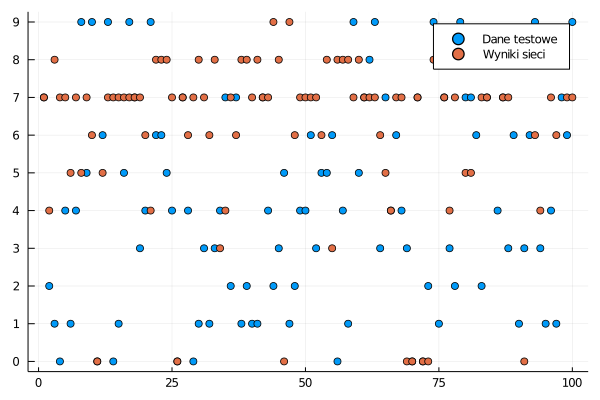

In [16]:
using Plots
x = 1:test_len
println(x)
y = test_y_dig[1:test_len]
println(length(y))
println(length(y_predicted_list))
y_data = hcat(y, y_predicted_list)
println(y_data)
plot(x,y_data, yticks = 0:1:10, seriestype = :scatter, label = ["Dane testowe" "Wyniki sieci"], lw = 10)

Błąd w kolejnych iteracjach podczas uczenia.

In [62]:
using Plots
x = 1:epochs
plot(x,E)

UndefVarError: [91mUndefVarError: epochs not defined[39m

In [37]:
poprawić alokacje na view

LoadError: [91msyntax: extra token "alokacje" after end of expression[39m